<h1> Section 1) Problem description (0%) </h1>

<h3>In this assignment you will get to practice with a very simple neural network implementation from scratch. This neural network, will have to learn what the important features are in the data to produce the output. In particular, this neural net will be given an input matrix of zeros and ones. The output to each sample will be a single one or zero. The output will be determined by the number in the first feature column of the data samples.

In [1]:
#Import required libraries
import numpy as np 
import matplotlib.pyplot as plt 
from numpy import genfromtxt

<h1> Section 2) This is your starting code for this assignment (20%) </h1>
<h3>(If you copy this code block and execute it it will run. However in this section the request for full credit is to change the inputs and outputs to a function or functions that fetches the inputsANDoutputs.csv file and produces the needed input and output arrays for you. Failure to implement a function to do this will drop your score for this section to 0%. If you cannot figure it out and only alter the code to insert the values manually to proceed to the other sections, will only earn you 5%)

The link for the training data is the following: https://github.com/barnysanchez/clarku-assignment4/raw/main/inputANDoutputs.csv

In [2]:
#Input data and the location to fetch data is: https://github.com/barnysanchez/clarku assignment4/raw/main/inputANDoutputs.csv
my_data = genfromtxt('https://github.com/barnysanchez/clarku-assignment4/raw/main/inputANDoutputs.csv',delimiter=',',skip_header=1)

In [3]:
#Use two functions to generate the input and output
inputs = my_data[:, :-1]
outputs = my_data[:,[-1]]

[[0.99848281]]  - Correct:  1
[[0.00412886]]  - Correct:  0


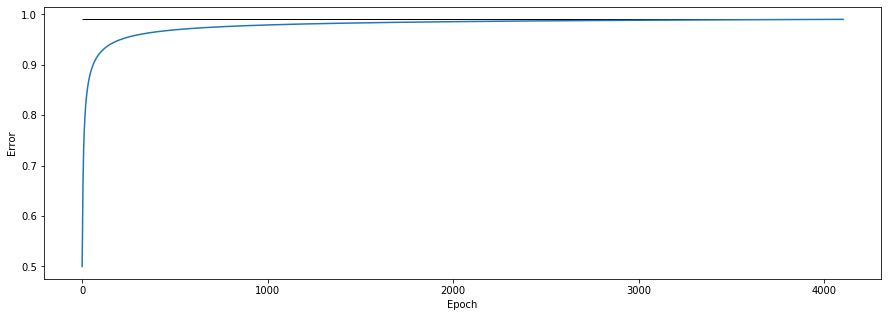

In [164]:
# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, inputs, outputs):
        self.inputs  = inputs
        self.outputs = outputs
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = 1/1+e^(-x)
    def sigmoid(self, x, deriv=False):
        if deriv == True:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.sigmoid(np.dot(self.inputs, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.outputs - self.hidden
        delta = self.error * self.sigmoid(self.hidden, deriv=True)
        self.weights += np.dot(self.inputs.T, delta)

    # train the neural net for 5 iterations
    def train(self, epochs=4100):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        prediction = self.sigmoid(np.dot(new_input, self.weights))
        return prediction

# create neural network   
NN = NeuralNetwork(inputs, outputs)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[1, 1, 0]])
example_2 = np.array([[0, 1, 1]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.hlines(y= 0.99, xmin=0, xmax=len(NN.error_history), linewidth=1) 
plt.plot(NN.epoch_list,[1-error for error in NN.error_history])
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

<h1>Section 3) Determine the number of epochs needed to achieve 99% prediction accuracy. Manipulate the plot to clearly show this (35%)
 </h1>
<h3>(Once with the code running after your previous modifications, determine the number of epochs needed to achieve 99% prediction accuracy. I will look at your plot for this but put a comment in your Jupyter cells and call out that number clearly, the number of epochs you determined were needed. The plot will give me confirmation of your statement.)

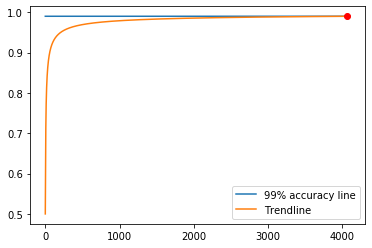

[4057]


In [173]:
#Use np.sign in combination with np.diff and np.argwhere to obtain the indices of intersection points 
# where the 99% accuracy line and the trendline.
x=np.arange(0, len(NN.epoch_list))
y1=np.array([0.99,]*len(NN.epoch_list))
y2=np.array([1-error for error in NN.error_history])

idx=np.argwhere(np.diff(np.sign(y1 - y2 )) != 0).reshape(-1) + 0
plt.plot(x, y1)
plt.plot(x, y2)
for i in range(len(idx)):
    plt.plot((x[idx[i]]+x[idx[i]+1])/2.,(y1[idx[i]]+y1[idx[i]+1])/2., 'ro')
plt.legend(['99% accuracy line', 'Trendline'])
plt.show()   


In [181]:
#Give the exactly number of epochs: 4057 epochs
print('The number of epochs needed to achieve 99% prediction accuracy:',x[idx])

The number of epochs needed to achieve 99% prediction accuracy: [4057]


<h1> Section 4) Change the prediction function to use a softmax activation function instead of sigmoid and determine the number of epochs needed to achieve 99% prediction accuracy with the new prediction function. Manipulate the plot to clearly show this (45%)</h1>

In [174]:
class NeuralNetwork_softmax:

    # intialize variables in class
    def __init__(self, inputs, outputs):
        self.inputs  = inputs
        self.outputs = outputs
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> exp(logits) / reduce_sum(exp(logits), dim)
    def softmax(self, x, deriv=False):
        if deriv == True:
            return x * (1 - x)
        return np.exp(x)/ np.sum(np.exp(x), axis=0)

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.softmax(np.dot(self.inputs, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.outputs - self.hidden
        delta = self.error * self.softmax(self.hidden, deriv=True)
        self.weights += np.dot(self.inputs.T, delta)

    # train the neural net for 1000 iterations
    def train(self, epochs=1000):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        prediction = self.softmax(np.dot(new_input, self.weights))
        return prediction

[[1.]]  - Correct:  1
[[1.]]  - Correct:  0


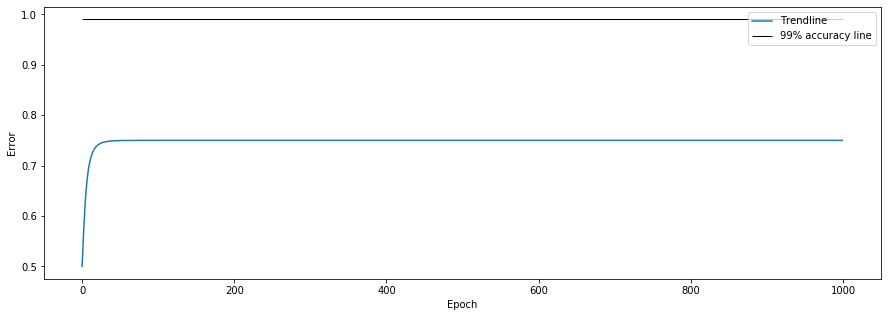

In [184]:
# create neural network   
NN = NeuralNetwork_softmax(inputs, outputs)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[1, 1, 0]])
example_2 = np.array([[0, 1, 1]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.hlines(y= 0.99, xmin=0, xmax=len(NN.error_history), linewidth=1) 
plt.plot(NN.epoch_list,[1-error for error in NN.error_history])
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(['Trendline', '99% accuracy line'])
plt.show()

<h2> For some reasons, I found that the error rate no longer decreases after reaching 25%. That is to say, there is no hope of achieving 99% accuracy. I think there is some error in my softmax function definition. But I still hope to reach the goal of 99%, so I decided to use tensorflow

In [191]:
import tensorflow as tf 

In [192]:
#tensorflow's soft receive another type y label, so I manully define it
output = np.array([[1,0],
       [1,0],
       [0,1],
       [0,1]])

In [193]:
xx = tf.placeholder(tf.float32, [None, 3])
yy = tf.placeholder(tf.float32, [None, 2])
nb_classes = 2

In [194]:
W = tf.Variable(tf.random_normal([3, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

In [195]:
# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(xx, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(yy * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [196]:
# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(2101):
        sess.run(optimizer, feed_dict={xx: inputs, yy: output})
        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={xx: inputs, yy: output}))

0 0.43831235
100 0.13446847
200 0.08047837
300 0.057823684
400 0.045259938
500 0.037239857
600 0.031663228
700 0.027555415
800 0.02440079
900 0.021900605
1000 0.019869406
1100 0.01818608
1200 0.016767872
1300 0.015556511
1400 0.014509651
1500 0.013595829
1600 0.012791085
1700 0.012076887
1800 0.01143881
1900 0.010865163
2000 0.010346721
2100 0.00987574


<h2> As a result, I think we can expect 99% accuracy rate if our epochs is larger than 2100 while we use softmax function.